# Overview

In this notebook, we perform a grid search over the parameters $v_1$ and $v_2$. All results are automatically saved in a ``json`` file.  

Each entry in this file corresponds to a specific parameter configuration and includes:

- the tested value of $\kappa$,  
- the resulting worst-case convergence rate,  
- and the associated values of $\nu_1$ and $\nu_2$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import json

from lib.grid_search import run_grid_search
from lib.grid_search import extract_data

### Grid search setting

In [ ]:
kappas = np.logspace(0, 3, 20)
n_ZF = 6
rho_max= 1.3
eps= 1e-6

#number of points to perform grid search around the TM parameter
n_points=20

# To avoid computing rates higher than 1
cutoff = 1

After running the cells corresponding to the standard **A-ADMM** or **OR-A-ADMM** algorithms, all results including the worst-case convergence rates as well as the grid-searched values of $v_1$ and $v_2$ are saved in the directory specified by `results_path`.

The comparison of the *worst-case convergence rates* is not performed here; it is presented separately in the notebook **`convergence_rates.ipynb`**.


**Note:**

The results generated from the previous grid search are stored in the "Grid_search_results.json", and "OR_Grid_search_results.json" files.
If you intend to re-run the grid search from scratch, please modify the results_path parameter to a custom filename of your choice in order to prevent overwriting the existing results.

### Running the Grid Search for Standard A-ADMM 

In [ ]:
alpha= 1
results_path = "../results/grid_search_results.json"

result = run_grid_search(
    kappas,
    threshold=cutoff,
    n_ZF=n_ZF,
    algo="A-ADMM (GS)",
    alpha=alpha,
    n_points=n_points,
    json_filename=results_path
)

### Running the Grid Search for OR-A-ADMM 

In [ ]:
alpha = 1.45
results_path = "../results/grid_search_results_OR.json"


result = run_grid_search(
    kappas,
    threshold=cutoff,
    n_ZF=n_ZF,
    algo="OR-A-ADMM (GS)",
    alpha=alpha,
    n_points=n_points,
    json_filename=results_path
)

## Fig.2 (a)

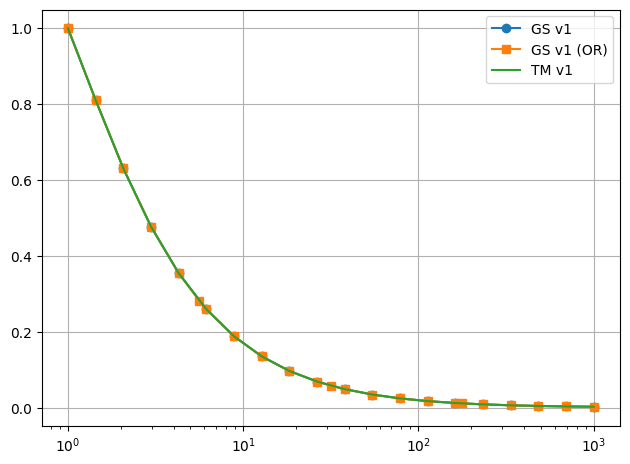

In [ ]:
gamma = 1 - 1 / np.sqrt(kappas)
v1_TM = (1 + gamma) / kappas
v2_TM = (gamma ** 2) / (2 - gamma)


with open("../results/grid_search_results.json", "r") as f:
    data1 = json.load(f)
kappa_GS, _, v1_GS, v2_GS,_,_ = extract_data(data1)



with open("../results/grid_search_results_OR.json", "r") as f:
    data2 = json.load(f)
kappa_OR, _, v1_OR, v2_OR,_,_ = extract_data(data2)

plt.xscale('log')
plt.grid(True); plt.tight_layout()
plt.plot(kappa_GS, v1_GS , 'o-',  label="GS v1")
plt.plot(kappa_OR, v1_OR , 's-', label="GS v1 (OR)")
plt.plot(kappas, v1_TM, label=f'TM v1')
plt.legend()
plt.show()

## Fig.2 (b)

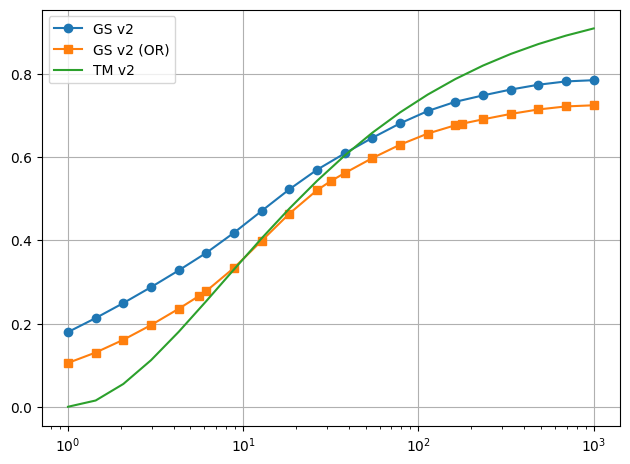

In [4]:
plt.xscale('log')
plt.grid(True); plt.tight_layout()
plt.plot(kappa_GS, v2_GS , 'o-',  label="GS v2")
plt.plot(kappa_OR, v2_OR , 's-', label="GS v2 (OR)")
plt.plot(kappas, v2_TM, label=f'TM v2')
plt.legend()
plt.show()